## Εργασία 6 - Neural Networks
### Ερώτημα 1. Να χωριστεί το dataset σε 80% training και 20% test sets με τυχαίο τροπο

In [1]:
import torch
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

Αρχικά, φορτώνουμε το iris dataset με την βοήθεια της sklearn 

In [2]:
from sklearn.datasets import load_iris

Στη συνέχεια, αποθηκεύουμε το dataset στην μεταβλητή iris, μέσω pandas το μετατρέπουμε σε DataFrame, όπου το χωρίζουμε σε δεδομένα και στόχους (δηλαδή τα labels Iris Setosa, Iris Verginica, Iris Versicolor)

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


Για την διάσπαση του dataset σε ποσοστά 80-20 train, test με τυχαίο τρόπο χρησιμοποιούμε από την sklearn το train_test_split αφού πρώτα έχουμε ορίσει τα δεδομένα (features) που περιέχει τις μετρήσεις των φυτών και σε στόχους (labels) που περιέχει τις 3 κλάσεις που προαναφέρθηκαν.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
features = df.drop('target',axis=1).values
label = df['target'].values


Παρατίθενται διαγράμματα που απεικονίζουν τις κλάσεις με διάφορες μορφές μετρήσεων κάθε φορά. Παρατηρούμε, πως η κλάση Iris Setosa είναι αρκετά διαχωρίσιμη σε σχέση με τις άλλες 2 κλάσεις.

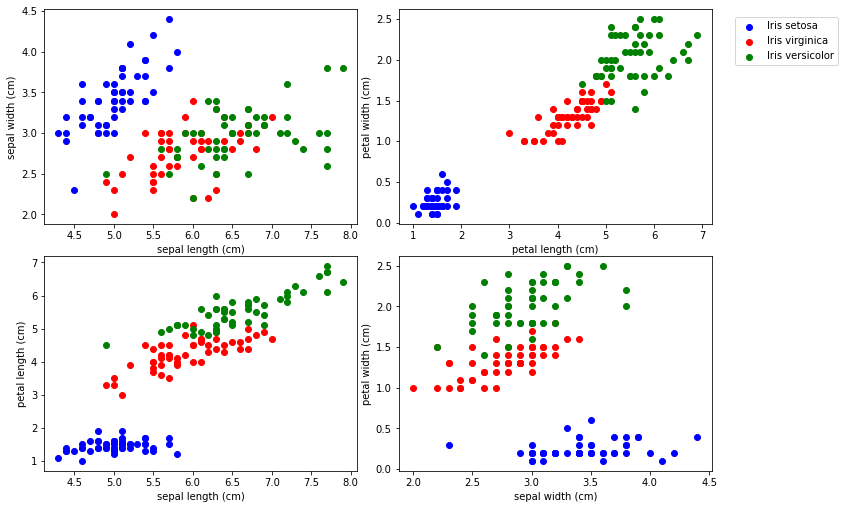

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=33)


### Ερώτημα 2. Να εκπαιδευτεί νευρωνικό δίκτυο 2 επιπέδων για την ταξινόμηση των δειγμάτων, όπου το 1ο layer θα έχει 30 νευρώνες και συνάρτηση ενεργοποιήσης sigmoid.

Για την εισαγωγή των δεδομένων στο νευρωνικό δίκτυο πρέπει πρώτα να τα μετατρέψουμε σε Tensor, και όχι στη μορφή που έχουν (arrays) και μετά να φτιάξουμε ένα train_dataloader με batch_size=120 και ένα test_dataloader με batch_size = 30, δηλαδή σε κάθε epoch που θα τρέχει το δίκτυο μας, ως train θα χρησιμοποιεί όλα τα 120 samples και ως test ομοίως όλα τα 30 samples.

In [9]:
from torch.utils.data import  DataLoader,TensorDataset

Για τη δημιουργία του TensorDataset στα δεδομένα X_train,X_test χρησιμοποιήθηκε FloatTensor καθώς θέλουμε να κρατήσουμε τις δεκαδικές τιμές ενώ τα labels y_train,y_test εφόσον έχουν τιμές 0,1,2 χρησιμοποιήθηκε LongTensor. 

In [10]:
train = TensorDataset(torch.FloatTensor(X_train),torch.LongTensor(y_train))
test = TensorDataset(torch.FloatTensor(X_test),torch.LongTensor(y_test))
train_dataloader = DataLoader(train,batch_size=120)
test_dataloader = DataLoader(test,batch_size=30)


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Για τη δημιουργία του νευρωνικού δικτύου χρησιμοποιούμε μια class με όνομα NeuralNetwork και ορίζω πως είναι νευρωνικό μέσω του nn.Module. Στη συνέχεια, ορίζω μία συνάρτηση __init__ για να δείξω από τι θα αποτελείται το νευρωνικό. Στη συγκεκριμένη περίπτωση θέλω 2 layers (1 hidden layer και ένα output layer) και 30 νευρώνες. 
Αναλυτικά θα έχει το input layer με 4 εισόδους ( 4 διαφορετικά χαρακτηριστικά του φυτού) και 30 εξόδους(νευρώνες), στη συνέχεια μέσω σιγμοειδούς συνάρτησης θα έχει το hidden layer με είσοδο 30 νευρώνες και έξοδο 30 νευρώνες και πάλι μέσω σιγμοειδούς θα έχω το output layer με είσοδο 30 νευρώνες και έξοδο 3 (3 κλάσεις).
Πάντα πρέπει να υπάρχει το super(NeuralNetwork,self) για να κληρωνομείται σωστά.
Στη συνέχεια, ορίζω το forward όπου βάζω το x μέσα στο δίκτο που δημιούργησα και το επιστρέφω

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(4, 30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

model = NeuralNetwork()

Χρησιμοποιείται seed 32 και το NeuralNetwork παίρνει όνομα model

In [13]:
torch.manual_seed(32)
model = NeuralNetwork()

Μετά από εκτύπωση των παραμέτρων του μοντέλου, παρατηρούμε όπως ήταν αναμενόμενο το input layer με 4,30 διαστάσεις, το hidden με 30,30 και το output με 30,3
Τα υπόλοιπα είναι τα bias σε κάθε layer που είναι μια προσθετική παράμετρος για κάθε νευρώνα.

In [14]:
params = list(model.parameters())
print("Number of learnable parameters' sets: " , len(params))
for i in params:
    print(i.size())  

Number of learnable parameters' sets:  6
torch.Size([30, 4])
torch.Size([30])
torch.Size([30, 30])
torch.Size([30])
torch.Size([3, 30])
torch.Size([3])


Ορίζονται η συνάρτηση loss και ο εκτιμητής (optimizer) που στην περίπτωση μας είναι ο SGD - Stohastic Gradient Descent με ρυθμό μάθησης (learning rate) 0.1. Η τιμή αυτή επιλέχθηκε μετά από διάφορες τιμές ως η καλύτερη τιμή εκμάθησης για την σιγμοειδή. 

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), 0.1)

Ορίζονται 2 συναρτήσεις, μία για την εκπαίδευση - train loop και μία για το τεστ - test loop. 
H train loop υπολογίζει για όλο το train dataloader τα predictions και τα loss. Στη συνέχεια, γίνεται back propagation και μέσω του optimizer.zero_grad μηδενίζεται ο optimizer για να μην κρατήσει τίποτα από κάποιο άλλο run , loss.backward για να ξεκινήσει προς τα πίσω και optimizer.step για να κάνει update τις διορθώσεις για τα βάρη.
Η test loop τρέχει όλο το test dataloader και υπολογίζει σε κάθε epoch πόσα σωστά predictions έγιναν

In [16]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Predict and calculate the loss on forward
        pred = model(X)
        loss = loss_fn(pred, y)
    
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"loss: {loss:>7f}")
        
correct_list = []
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        
        for X, y in dataloader:
            
            pred =model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
        correct /= size
        correct_list.append(correct)
        
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct_list


Για να φθάσει το νευρωνικό δίκτυο με σιγμοειδή συνάρτηση ενεργοποίησης 100% ακρίβεια χρησιμοποιήθηκαν, μετά από δοκιμές 700 epochs. 
Γενικά, λόγω της κατασκευής της σιγμοειδούς δεν αποδίδει καλά καθώς όλα τα αρνητικά τα θεωρεί 0 και για την καλύτερη απόδοση της χρησιμοποιήθηκαν αρκετά epochs. 

In [17]:
epochs = 700
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    
    test_loop(test_dataloader, model, loss_fn)
    
print("We have the best accuracy")


Epoch 1
-------------------------------
loss: 1.227947
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.171841 

Epoch 2
-------------------------------
loss: 1.166101
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.139477 

Epoch 3
-------------------------------
loss: 1.132692
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.124530 

Epoch 4
-------------------------------
loss: 1.114708
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.118331 

Epoch 5
-------------------------------
loss: 1.105113
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.116300 

Epoch 6
-------------------------------
loss: 1.100017
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.116087 

Epoch 7
-------------------------------
loss: 1.097285
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.116543 

Epoch 8
-------------------------------
loss: 1.095771
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.117144 

Epoch 9
-------------------------------
loss: 1.094875
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.117677 

Epoch 10
----------------------------

### Ερώτημα 3. Να αποτυπωθεί η εξέλιξη του test accuracy μετά από κάθε epoch και να υπολογιστεί ο πίνακας σύγχυσης του τελικού μοντέλου για το test set.

Παρατηρούμε, πως η σιγμοειδής συνάρτηση ενεργοποίησης δυσκολεύεται να φτάσει υψηλή ακρίβεια στο test σετ και θέλει πολύ μεγάλο αριθμό epochs, κάτι που δεν είναι επιθυμητό σε ένα νευρωνικό δίκτυο.

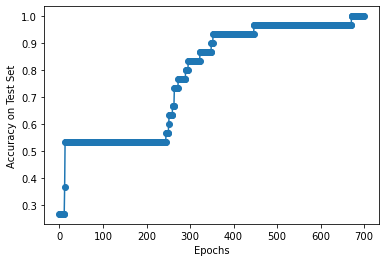

In [18]:
plt.plot(correct_list,'-o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy on Test Set")
plt.show()

Στο πίνακα σύγχυσης, παρατηρούμε πως οι κλάσεις μετά απο 700 epochs όπου το νευρωνικό δίκτυο έχει συγκλίνει, ταξινομούνται όλες οι κλάσεις σωστά.

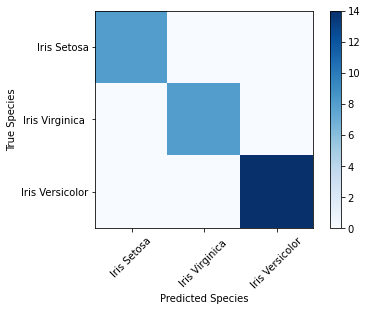

array([[ 8,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 14]], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data to get true and predicted labels
for inputs, labels in test_dataloader:
        output = model(inputs) 

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save predicted labels
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save true labels
        
classes = ('Iris Setosa', 'Iris Virginica ', 'Iris Versicolor')

#Plot and compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()
cm


### Ερώτημα 4. Να επαναληφθεί η εκπαίδευση με συνάρτηση ενεργοποίησης την ReLU. Τι παρατηρείτε;




Πραγματοποιούνται ακριβώς τα ίδια με τα βήματα 2,3 με τη μόνη διαφορά πως η συνάρτηση ενεργοποίησης πλέον είναι η ReLU - Rectified Linear Unit. Αυτό που περιμένουμε είναι να έχουμε πολύ καλύτερα αποτελέσματα από πριν καθώς η reLU επιτρέπει γρήγορους υπολογισμούς και λύνει διάφορα προβλήματα της σιγμοειδούς.

In [20]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super(NeuralNetwork2, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(4, 30),
            nn.ReLU(),
            nn.Linear(30,30),
            nn.ReLU(),
            nn.Linear(30, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

model2 = NeuralNetwork2()

In [21]:
torch.manual_seed(64)
model2 = NeuralNetwork2()

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), 0.01)
def train_loop2(dataloader, model2, criterion, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Predict and calculate the loss on forward
        y_pred = model2(X)
        loss2 = criterion(y_pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss2.backward()
        optimizer.step()

        print(f"loss: {loss2:>7f}")

correct_list2 = []
def test_loop2(dataloader, model2, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss2, correct2 = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred2 = model2(X)
            test_loss2 += criterion(pred2, y).item()
            correct2 += (pred2.argmax(1) == y).type(torch.float).sum().item()
            

    
        correct2 /= size
        correct_list2.append(correct2)
        print(f"Test Error: \n Accuracy: {(100*correct2):>0.1f}%, Avg loss: {test_loss2:>8f} \n")
    return correct_list2


In [23]:
epochs =  500
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop2(train_dataloader, model2, criterion, optimizer)
    test_loop2(test_dataloader, model2, criterion)
    
print("We have the best accuracy")

Epoch 1
-------------------------------
loss: 1.111172
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.151920 

Epoch 2
-------------------------------
loss: 1.097320
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.132062 

Epoch 3
-------------------------------
loss: 1.085331
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.114768 

Epoch 4
-------------------------------
loss: 1.074953
Test Error: 
 Accuracy: 40.0%, Avg loss: 1.099489 

Epoch 5
-------------------------------
loss: 1.065798
Test Error: 
 Accuracy: 46.7%, Avg loss: 1.085870 

Epoch 6
-------------------------------
loss: 1.057612
Test Error: 
 Accuracy: 53.3%, Avg loss: 1.073638 

Epoch 7
-------------------------------
loss: 1.050175
Test Error: 
 Accuracy: 53.3%, Avg loss: 1.062561 

Epoch 8
-------------------------------
loss: 1.043309
Test Error: 
 Accuracy: 53.3%, Avg loss: 1.052520 

Epoch 9
-------------------------------
loss: 1.036950
Test Error: 
 Accuracy: 53.3%, Avg loss: 1.043393 

Epoch 10
----------------------------

Όπως αναμέναμε, το νευρωνικό δίκτυο χρειάζεται πολύ λιγότερα epochs για να φθάσει 100% ακρίβεια και να συγκλίνει. 
Επισημαίνεται εδώ, πως επιλέχθηκε ως τιμή τα 500 epochs για να μπορούν να παρασταθούν σε κοινό διάγραμμα τα accuracies με σιγμοειδή και ReLU.

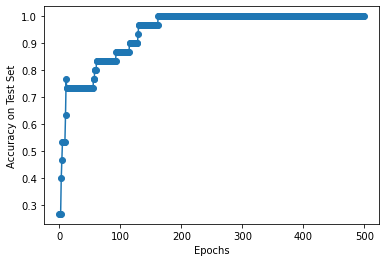

In [24]:
plt.plot(correct_list2,'-o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy on Test Set")
plt.show()


Ομοίως με πάνω, ο πίνακας σύγχυσης εφόσον το μοντέλο μας έχει συγκλίνει απόλυτα μας δείχνει πως και οι 3 κλάσεις έχουν ταξινομηθεί σωστά.


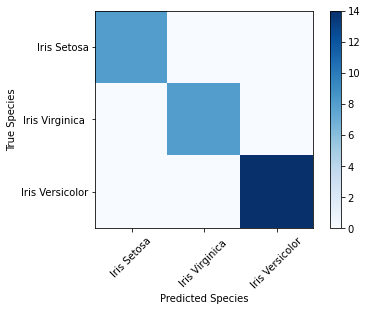

array([[ 8,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 14]], dtype=int64)

In [25]:
y_pred2 = []
y_true2 = []

# iterate over test data to get true and predicted labels
for inputs, labels in test_dataloader:
        output2 = model2(inputs)

        output2 = (torch.max(torch.exp(output2), 1)[1]).data.cpu().numpy()
        y_pred2.extend(output2) # Save predicted labels
        
        labels = labels.data.cpu().numpy()
        y_true2.extend(labels) # Save true labels
        
classes = ('Iris Setosa', 'Iris Virginica ', 'Iris Versicolor')

#Plot and compute confusion matrix
cm2 = confusion_matrix(y_true2, y_pred2)
plt.imshow(cm2, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()
cm2

Για την καλύτερη παρατήρηση των διαφορών στην ακρίβεια του test set με διαφορετικές συναρτήσεις ενεργοποίησης γίνεται plot και των 2 μαζί.

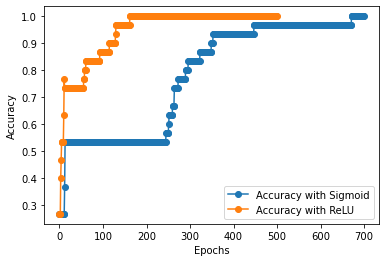

In [26]:
plt.plot(correct_list,'-o')
plt.plot(correct_list2,'-o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy with Sigmoid','Accuracy with ReLU'])
plt.show()

Για την καλύτερηση εξήγηση του γιατί η σιγμοειδής δεν αποδίδει καλά, επαναλήφθηκαν όλα τα παραπάνω βήματα αλλά με μικρότερη τιμή epochs. Πλέον το νευρωνικό δίκτυο, όπως παρατηρείται και από τον πίνακα σύγχυσης, αδυνατεί να ξεχωρίσει τις κλάσεις.

In [27]:
class NeuralNetwork3(nn.Module):
    def __init__(self):
        super(NeuralNetwork3, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(4, 30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

model3 = NeuralNetwork3()

In [28]:
torch.manual_seed(96)
model3 = NeuralNetwork3()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), 0.01)
def train_loop3(dataloader, model3, criterion, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Predict and calculate the loss on forward
        y_pred = model3(X)
        loss3 = criterion(y_pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss3.backward()
        optimizer.step()

        #print(f"loss: {loss2:>7f}")

correct_list3 = []
def test_loop3(dataloader, model3, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss3, correct3 = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred3 = model3(X)
            test_loss3 += criterion(pred3, y).item()
            correct3 += (pred3.argmax(1) == y).type(torch.float).sum().item()
            

    
        correct3 /= size
        correct_list3.append(correct3)
        #print(f"Test Error: \n Accuracy: {(100*correct2):>0.1f}%, Avg loss: {test_loss2:>8f} \n")
    return correct_list3


In [29]:
epochs =  500
for t in range(epochs):
    
    train_loop3(train_dataloader, model3, criterion, optimizer)
    test_loop3(test_dataloader, model3, criterion)

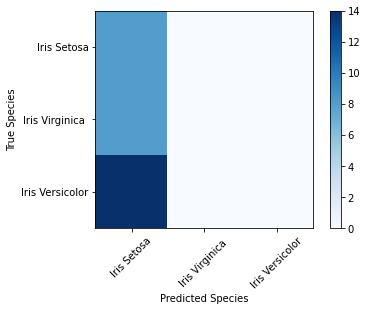

array([[ 8,  0,  0],
       [ 8,  0,  0],
       [14,  0,  0]], dtype=int64)

In [30]:
y_pred3 = []
y_true3 = []

# iterate over test data to get true and predicted labels
for inputs, labels in test_dataloader:
        output3 = model3(inputs)

        output3 = (torch.max(torch.exp(output3), 1)[1]).data.cpu().numpy()
        y_pred3.extend(output3) # Save predicted labels
        
        labels = labels.data.cpu().numpy()
        y_true3.extend(labels) # Save true labels
        
classes = ('Iris Setosa', 'Iris Virginica ', 'Iris Versicolor')

# Plot and compute confusion matrix
cm3 = confusion_matrix(y_true3, y_pred3)
plt.imshow(cm3, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()
cm3

### Ερώτημα 5. Πειραματιστείτε με τις παραμέτρους σχεδίασης, και προτείνετε ένα δίκτυο που επιτυγχάνει καλύτερη ακρίβεια από τα προηγούμενα. Τεκμηριώστε το αποτέλεσμα με τα απαραίτητα γραφήματα και πίνακες σύγχυσης

Ως πρώτη δοκιμή, δημιουργήθηκαν batches με μέγεθος 60 δεδομένα για τα train,test sets και μείωθηκαν οι νευρώνες στα layers για την αποφυγή overfit. Επίσης, χρησιμοποιήθηκε optimizer ο Adam. Για συνάρτηση ενεργοποίησης χρησιμοποιήθηκε η ReLU που είναι πολύ πιο γρήγορη υπολογιστικά από την sigmoid και κάνει καλύτερο classification των δεδομένων.
Ο Adam optimizer υπολογίζει ξεχωριστά προσαρμοσμένους ρυθμούς εκμάθησης για διαφορετικές παραμέτρους από την πρώτη και δεύτερη χρονική βαθμίδα.

In [31]:
train_dataloader1 = DataLoader(train,batch_size=60)
test_dataloader1 = DataLoader(test,batch_size=60)

In [32]:
class NeuralNetwork4(nn.Module):
    def __init__(self):
        super(NeuralNetwork4, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10,9),
            nn.ReLU(),
            nn.Linear(9, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

model4 = NeuralNetwork4()

In [33]:
torch.manual_seed(32)
model4 = NeuralNetwork4()

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), 0.01)
def train_loop4(dataloader, model4, criterion, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Predict and calculate the loss on forward
        y_pred = model4(X)
        loss4 = criterion(y_pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss4.backward()
        optimizer.step()

        print(f"loss: {loss4:>7f}")

correct_list4 = []
def test_loop4(dataloader, model4, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss4, correct4 = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred4 = model4(X)
            test_loss4 += criterion(pred4, y).item()
            correct4 += (pred4.argmax(1) == y).type(torch.float).sum().item()
            

    
        correct4 /= size
        correct_list4.append(correct4)
        print(f"Test Error: \n Accuracy: {(100*correct4):>0.1f}%, Avg loss: {test_loss4:>8f} \n")
    return correct_list4


In [35]:
epochs =  200
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop4(train_dataloader1, model4, criterion, optimizer)
    test_loop4(test_dataloader1, model4, criterion)
    
print("We have the best accuracy")


Epoch 1
-------------------------------
loss: 1.073302
loss: 1.075974
Test Error: 
 Accuracy: 46.7%, Avg loss: 1.017651 

Epoch 2
-------------------------------
loss: 1.033164
loss: 1.034405
Test Error: 
 Accuracy: 16.7%, Avg loss: 0.982363 

Epoch 3
-------------------------------
loss: 0.992528
loss: 0.988408
Test Error: 
 Accuracy: 30.0%, Avg loss: 0.943938 

Epoch 4
-------------------------------
loss: 0.948251
loss: 0.943141
Test Error: 
 Accuracy: 53.3%, Avg loss: 0.905242 

Epoch 5
-------------------------------
loss: 0.908777
loss: 0.902387
Test Error: 
 Accuracy: 53.3%, Avg loss: 0.870915 

Epoch 6
-------------------------------
loss: 0.874711
loss: 0.872312
Test Error: 
 Accuracy: 50.0%, Avg loss: 0.827721 

Epoch 7
-------------------------------
loss: 0.840244
loss: 0.843172
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.781854 

Epoch 8
-------------------------------
loss: 0.806543
loss: 0.820543
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.744319 

Epoch 9
----------------

Παρατηρούμε πως ανταποκρίνεται πολύ καλά στα δεδομένα μας έναντι του SGD κάτι που μπορεί να οφείλεται στο γεγονός πως ο αλγόριθμος Adam χρησιμοποιεί δύο μεθόδους gradient descent το momentum- που επιταχύνει τον αλγόριθμο λαμβάνοντας υπόψη τον εκθετικό μέσο όρο βαρών των gradient και το RMSP- που είναι ενας προσαρμοστικός αλγόριθμος εκμάθησης που χρησιμοποιεί τα exponential moving average

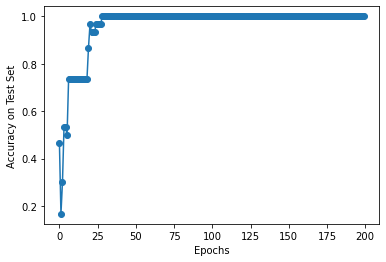

In [36]:
plt.plot(correct_list4,'-o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy on Test Set")
plt.show()

Δεύτερη δοκιμή ήταν, ο Adagrad optimizer με αριθμό νευρώνων 25 και 20 και ReLU ως συνάρτηση ενεργοποίησης. 
Ο αλγόριθμος Adagrad υπολογίζει το άθροισμα των τετραγώνων των βαθμίδων και προσπαθεί να προσπαρμόσει με αυτό το gradient σε διάφορες κατευθύνσεις. Με αυτό το τρόπο ο συγκεκριμένος αλγόριθμος χαρακτηριστικά που έχουν κάνει "update" πολλές φορές είναι πιθανό να μην κάνουν update στο μέλλον επιτρέποντας έτσι σε δεδομένα που είναι πιο "απλωμένα" στο χώρο και δεν έχουν κάνει update να κάνουν.

In [37]:
class NeuralNetwork5(nn.Module):
    def __init__(self):
        super(NeuralNetwork5, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(4, 25),
            nn.ReLU(),
            nn.Linear(25,20),
            nn.ReLU(),
            nn.Linear(20, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

model5 = NeuralNetwork5()

In [38]:
torch.manual_seed(12)
model5 = NeuralNetwork5()

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model5.parameters(), 0.01)
def train_loop5(dataloader, model5, criterion, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Predict and calculate the loss on forward
        y_pred = model5(X)
        loss5 = criterion(y_pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss5.backward()
        optimizer.step()

        print(f"loss: {loss5:>7f}")

correct_list5 = []
def test_loop5(dataloader, model5, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss5, correct5 = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred5 = model5(X)
            test_loss5 += criterion(pred5, y).item()
            correct5 += (pred5.argmax(1) == y).type(torch.float).sum().item()
            

    
        correct5 /= size
        correct_list5.append(correct5)
        print(f"Test Error: \n Accuracy: {(100*correct5):>0.1f}%, Avg loss: {test_loss5:>8f} \n")
    return correct_list5


In [40]:
epochs =  200
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop5(train_dataloader, model5, criterion, optimizer)
    test_loop5(test_dataloader, model5, criterion)
    
print("We have the best accuracy")

Epoch 1
-------------------------------
loss: 1.172354
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.093599 

Epoch 2
-------------------------------
loss: 1.073559
Test Error: 
 Accuracy: 96.7%, Avg loss: 1.033282 

Epoch 3
-------------------------------
loss: 1.022318
Test Error: 
 Accuracy: 96.7%, Avg loss: 0.993519 

Epoch 4
-------------------------------
loss: 0.984812
Test Error: 
 Accuracy: 100.0%, Avg loss: 0.964485 

Epoch 5
-------------------------------
loss: 0.954219
Test Error: 
 Accuracy: 100.0%, Avg loss: 0.935697 

Epoch 6
-------------------------------
loss: 0.924910
Test Error: 
 Accuracy: 100.0%, Avg loss: 0.909003 

Epoch 7
-------------------------------
loss: 0.896263
Test Error: 
 Accuracy: 100.0%, Avg loss: 0.882598 

Epoch 8
-------------------------------
loss: 0.868299
Test Error: 
 Accuracy: 100.0%, Avg loss: 0.857544 

Epoch 9
-------------------------------
loss: 0.841062
Test Error: 
 Accuracy: 100.0%, Avg loss: 0.833617 

Epoch 10
----------------------

Παρατηρούμε, πως έχει ακόμη καλύτερη απόκριση σε ταχύτητα

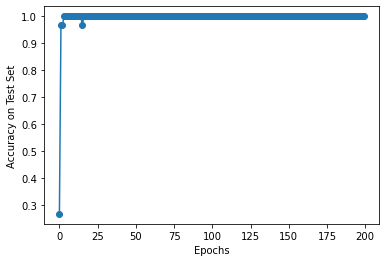

In [41]:
plt.plot(correct_list5,'-o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy on Test Set")
plt.show()

Τέλος, χρησιμοποιήθηκε και ως συνάρτηση ενεργοποίησης η tanh που έχει εύρος από -1 έως 1 και SGD optimizer

In [42]:
class NeuralNetwork6(nn.Module):
    def __init__(self):
        super(NeuralNetwork6, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(4, 20),
            nn.Tanh(),
            nn.Linear(20,60),
            nn.Tanh(),
            nn.Linear(60, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

model6 = NeuralNetwork6()

In [43]:
torch.manual_seed(123)
model6 = NeuralNetwork6()

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model6.parameters(), 0.01)
def train_loop6(dataloader, model6, criterion, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Predict and calculate the loss on forward
        y_pred = model6(X)
        loss6 = criterion(y_pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss6.backward()
        optimizer.step()

        print(f"loss: {loss6:>7f}")

correct_list6 = []
def test_loop6(dataloader, model6, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss6, correct6 = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred6 = model6(X)
            test_loss6 += criterion(pred6, y).item()
            correct6 += (pred6.argmax(1) == y).type(torch.float).sum().item()
            

    
        correct6 /= size
        correct_list6.append(correct6)
        print(f"Test Error: \n Accuracy: {(100*correct6):>0.1f}%, Avg loss: {test_loss6:>8f} \n")
    return correct_list6


In [45]:
epochs =  200
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop6(train_dataloader, model6, criterion, optimizer)
    test_loop6(test_dataloader, model6, criterion)
    
print("We have the best accuracy")

Epoch 1
-------------------------------
loss: 1.130168
Test Error: 
 Accuracy: 46.7%, Avg loss: 1.086969 

Epoch 2
-------------------------------
loss: 1.124025
Test Error: 
 Accuracy: 46.7%, Avg loss: 1.083465 

Epoch 3
-------------------------------
loss: 1.118061
Test Error: 
 Accuracy: 46.7%, Avg loss: 1.080016 

Epoch 4
-------------------------------
loss: 1.112263
Test Error: 
 Accuracy: 46.7%, Avg loss: 1.076612 

Epoch 5
-------------------------------
loss: 1.106618
Test Error: 
 Accuracy: 70.0%, Avg loss: 1.073248 

Epoch 6
-------------------------------
loss: 1.101115
Test Error: 
 Accuracy: 73.3%, Avg loss: 1.069918 

Epoch 7
-------------------------------
loss: 1.095742
Test Error: 
 Accuracy: 73.3%, Avg loss: 1.066616 

Epoch 8
-------------------------------
loss: 1.090489
Test Error: 
 Accuracy: 73.3%, Avg loss: 1.063338 

Epoch 9
-------------------------------
loss: 1.085347
Test Error: 
 Accuracy: 73.3%, Avg loss: 1.060078 

Epoch 10
----------------------------

Παρατηρούμε, πως ενώ αποδίδει σχετικά καλά δεν έχει την βέλτιστη ταχύτητα σύγκλισης σε σχέση με τις δύο προαναφερόμενες τεχνικές, παρόλο που η tanh είναι συμμετρική στο 0.

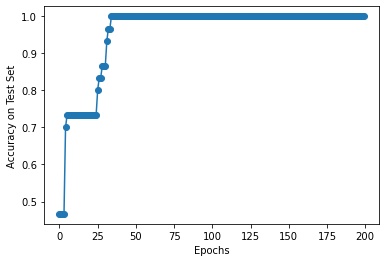

In [46]:
plt.plot(correct_list6,'-o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy on Test Set")
plt.show()

Μπορούμε να επιλέξουμε μία από τις 2 πρώτες δοκιμές με optimizers Adagrad ή Adam, αλλά ως βέλτιστο επιλέγεται η τεχνική με τον Adam optimizer. Παρακάτω παρατίθεται ο πίνακας σύγχυσης για τον Adam optimizer.

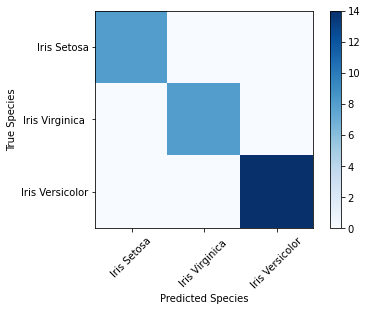

array([[ 8,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 14]], dtype=int64)

In [47]:
y_pred5 = []
y_true5 = []

# iterate over test data to get true and predicted labels
for inputs, labels in test_dataloader:
        output5 = model5(inputs)

        output5 = (torch.max(torch.exp(output5), 1)[1]).data.cpu().numpy()
        y_pred5.extend(output5) # Save predicted labels
        
        labels = labels.data.cpu().numpy()
        y_true5.extend(labels) # Save true labels
        
classes = ('Iris Setosa', 'Iris Virginica ', 'Iris Versicolor')

# Plot and compute confusion matrix
cm5 = confusion_matrix(y_true5, y_pred5)
plt.imshow(cm5, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()
cm5